# Data Analysis of DataSet World Population

In [224]:
#import requeried libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Explore Data

In [225]:
#load data of world population
df_population = pd.read_csv('./data/data_population_world.csv', sep=',')

#load data of metadata about countries
df_metadata = pd.read_csv('./data/metadata_countries.csv', sep=',')

#load country codes
df_codes = pd.read_csv('./data/country_codes.csv', sep=',')

In [226]:
#show a first 15 rows
df_population.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Población, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,NaN,AFE,"Población, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,NaN,AFW,"Población, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Población, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN
5,Albania,ALB,"Población, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,NaN
6,Andorra,AND,"Población, total",SP.POP.TOTL,9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,...,71367.0,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,NaN
7,El mundo árabe,ARB,"Población, total",SP.POP.TOTL,93359407.0,95760348.0,98268683.0,100892507.0,103618568.0,106444103.0,...,389131555.0,397922915.0,406501999.0,415077960.0,423664839.0,432545676.0,441467739.0,449228296.0,456520777.0,NaN
8,Emiratos Árabes Unidos,ARE,"Población, total",SP.POP.TOTL,133426.0,140984.0,148877.0,157006.0,165305.0,173797.0,...,8751847.0,8835951.0,8916899.0,8994263.0,9068296.0,9140169.0,9211657.0,9287289.0,9365145.0,NaN
9,Argentina,ARG,"Población, total",SP.POP.TOTL,20349744.0,20680653.0,21020359.0,21364017.0,21708487.0,22053661.0,...,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0,45808747.0,NaN


In [227]:
#show of total null values by column
df_population.isna().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2018                1
2019                1
2020                1
2021                1
Unnamed: 66       266
Length: 67, dtype: int64

In [228]:
#Show the estructure fields of dataframe
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

## Transform Data

In [229]:
# change format table to wide format into a large format

df_population = pd.melt(df_population,
                        id_vars=['Country Name',
                                 'Country Code',
                                 'Indicator Name',
                                 'Indicator Code'],
                        value_vars=df_population.iloc[:, 4:-1].columns,
                        var_name='year',
                        value_name=('total'))

In [230]:
#set column names
df_population.columns = ['country_name', 'country_code', 'indicator_name', 'indicator_code', 'year', 'population']

In [231]:
#show the first ten rows
df_population.head(10)

,country_name,country_code,indicator_name,indicator_code,year,population
0,Aruba,ABW,"Población, total",SP.POP.TOTL,1960,54608.0
1,NaN,AFE,"Población, total",SP.POP.TOTL,1960,130692579.0
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,1960,8622466.0
3,NaN,AFW,"Población, total",SP.POP.TOTL,1960,97256290.0
4,Angola,AGO,"Población, total",SP.POP.TOTL,1960,5357195.0
5,Albania,ALB,"Población, total",SP.POP.TOTL,1960,1608800.0
6,Andorra,AND,"Población, total",SP.POP.TOTL,1960,9443.0
7,El mundo árabe,ARB,"Población, total",SP.POP.TOTL,1960,93359407.0
8,Emiratos Árabes Unidos,ARE,"Población, total",SP.POP.TOTL,1960,133426.0
9,Argentina,ARG,"Población, total",SP.POP.TOTL,1960,20349744.0


In [232]:
#Show the new structure of dataframe
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    16368 non-null  object 
 1   country_code    16492 non-null  object 
 2   indicator_name  16492 non-null  object 
 3   indicator_code  16492 non-null  object 
 4   year            16492 non-null  object 
 5   population      16400 non-null  float64
dtypes: float64(1), object(5)
memory usage: 773.2+ KB


In [233]:
#show the null values by column
df_population.isna().sum()

country_name      124
country_code        0
indicator_name      0
indicator_code      0
year                0
population         92
dtype: int64

In [234]:
#delete nan row in column population

df_population = df_population.dropna(subset=['population'])

In [235]:
#show the null values by column
df_population.isna().sum()

country_name      124
country_code        0
indicator_name      0
indicator_code      0
year                0
population          0
dtype: int64

In [236]:
#select columns

df_population = df_population[['country_code',
                               'country_name',
                               'year',
                               'population']]

In [237]:
#show metada dataframe

df_metadata.head()

,Country Name,Country Code,Region,Income_Group,Unnamed: 4
0,Aruba,ABW,NaN,Ingreso alto,NaN
1,NaN,AFE,NaN,Agregados,NaN
2,Afganistán,AFG,Asia meridional,Países de ingreso bajo,NaN
3,NaN,AFW,NaN,Agregados,NaN
4,Angola,AGO,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN


In [238]:
#set metada name columns
df_metadata.columns = ['country_name', 'country_code', 'region','income_group', 'n']

#Set de nan values to Sin region value
df_metadata['region'] = df_metadata['region'].fillna('Sin region')

In [239]:
df_metadata.groupby('region')[['country_code']].count().sort_values('country_code', ascending=False)

,country_code
region,
Sin region,130
África al sur del Sahara (excluido altos ingresos),47
América Latina y el Caribe (excluido altos ingresos),24
Asia oriental y el Pacífico (excluido altos ingresos),24
Europa y Asia central (excluido altos ingresos),20
Oriente Medio y Norte de África (excluido altos ingresos),13
Asia meridional,8


In [240]:
df_metadata.groupby('income_group')[['country_code']].count().sort_values('country_code', ascending=False)

,country_code
income_group,
Ingreso alto,80
Ingreso mediano alto,54
Países de ingreso mediano bajo,54
Agregados,49
Países de ingreso bajo,28
No clasificado,1


### Union Metadata with population

In [241]:
#merge population dataframe with metadata dataframe to get aditional info
df_world_population = df_population.merge(df_metadata,
                                          left_on='country_code',
                                          right_on='country_code',
                                          how='inner')

#select the fields more fields (income_group, region)
df_world_population = df_world_population[['country_code',
                                           'country_name_x',
                                           'region',
                                           'income_group',
                                           'year',
                                           'population']]

In [242]:
df_world_population.groupby(['country_code', 'country_name_x'])[['population']].sum().sort_values('population', ascending=False)

,,population
country_code,country_name_x,
WLD,Mundo,3.327355e+11
IBT,BIRF y la AIF,2.720796e+11
LMY,Ingreso mediano y bajo,2.677390e+11
MIC,Ingreso mediano,2.459597e+11
IBD,Sólo BIRF,2.141098e+11
...,...,...
VGB,Islas Vírgenes Británicas,1.076286e+06
TCA,Islas Turcas y Caicos,1.046851e+06
PLW,Palau,9.448590e+05


In [243]:
#show de codes of countries table
df_codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [244]:
#get only countries data
df_countries_pop = df_world_population.merge(df_codes,
                                             left_on='country_code',
                                             right_on='alpha-3',
                                             how='inner')

In [245]:
df_countries_pop.groupby(['country_code', 'country_name_x'])[['population']].sum().sort_values('population', ascending=False)

,,population
country_code,country_name_x,
CHN,China,6.816114e+10
IND,India,5.578263e+10
USA,Estados Unidos,1.589066e+10
IDN,Indonesia,1.129391e+10
BRA,Brasil,9.210741e+09
...,...,...
VGB,Islas Vírgenes Británicas,1.076286e+06
TCA,Islas Turcas y Caicos,1.046851e+06
PLW,Palau,9.448590e+05


In [246]:
#select most important fields
df_countries_pop = df_countries_pop[['country_code',
                                     'country_name_x',
                                     'region_y',
                                     'sub-region',
                                     'income_group',
                                     'year',
                                     'population']]

#Set name of column final dataframe
df_countries_pop.columns = ['country_code',
                            'country_name',
                            'region_name',
                            'sub_region_name',
                            'income_group',
                            'year',
                            'population']

### Add new columns

In [247]:
#Sort data by country and year values ascending mode
df_countries_pop = df_countries_pop.sort_values(['country_code', 'year'], ascending=True)

In [248]:
#create a column diff to calculate % variation by country and year in your population rate
df_countries_pop['%_diff'] = df_countries_pop.groupby(['country_name'], 
                                                      group_keys=False)['population'].pct_change()*100

In [249]:
df_countries_pop['population_million'] = df_countries_pop['population']/1000000
df_countries_pop['population_million'] = df_countries_pop['population_million'].round(1)

## Explore Data 

### Analysis population by Colombia

In [287]:
df_population_col = df_countries_pop[df_countries_pop['country_name'] == 'China']

df_population_col.head(5)

,country_code,country_name,region_name,sub_region_name,income_group,year,population,%_diff,population_million
2170,CHN,China,Asia,Eastern Asia,Ingreso mediano alto,1960,667070000.0,NaN,667.1
2171,CHN,China,Asia,Eastern Asia,Ingreso mediano alto,1961,660330000.0,-1.010389,660.3
2172,CHN,China,Asia,Eastern Asia,Ingreso mediano alto,1962,665770000.0,0.823831,665.8
2173,CHN,China,Asia,Eastern Asia,Ingreso mediano alto,1963,682335000.0,2.488096,682.3
2174,CHN,China,Asia,Eastern Asia,Ingreso mediano alto,1964,698355000.0,2.347820,698.4


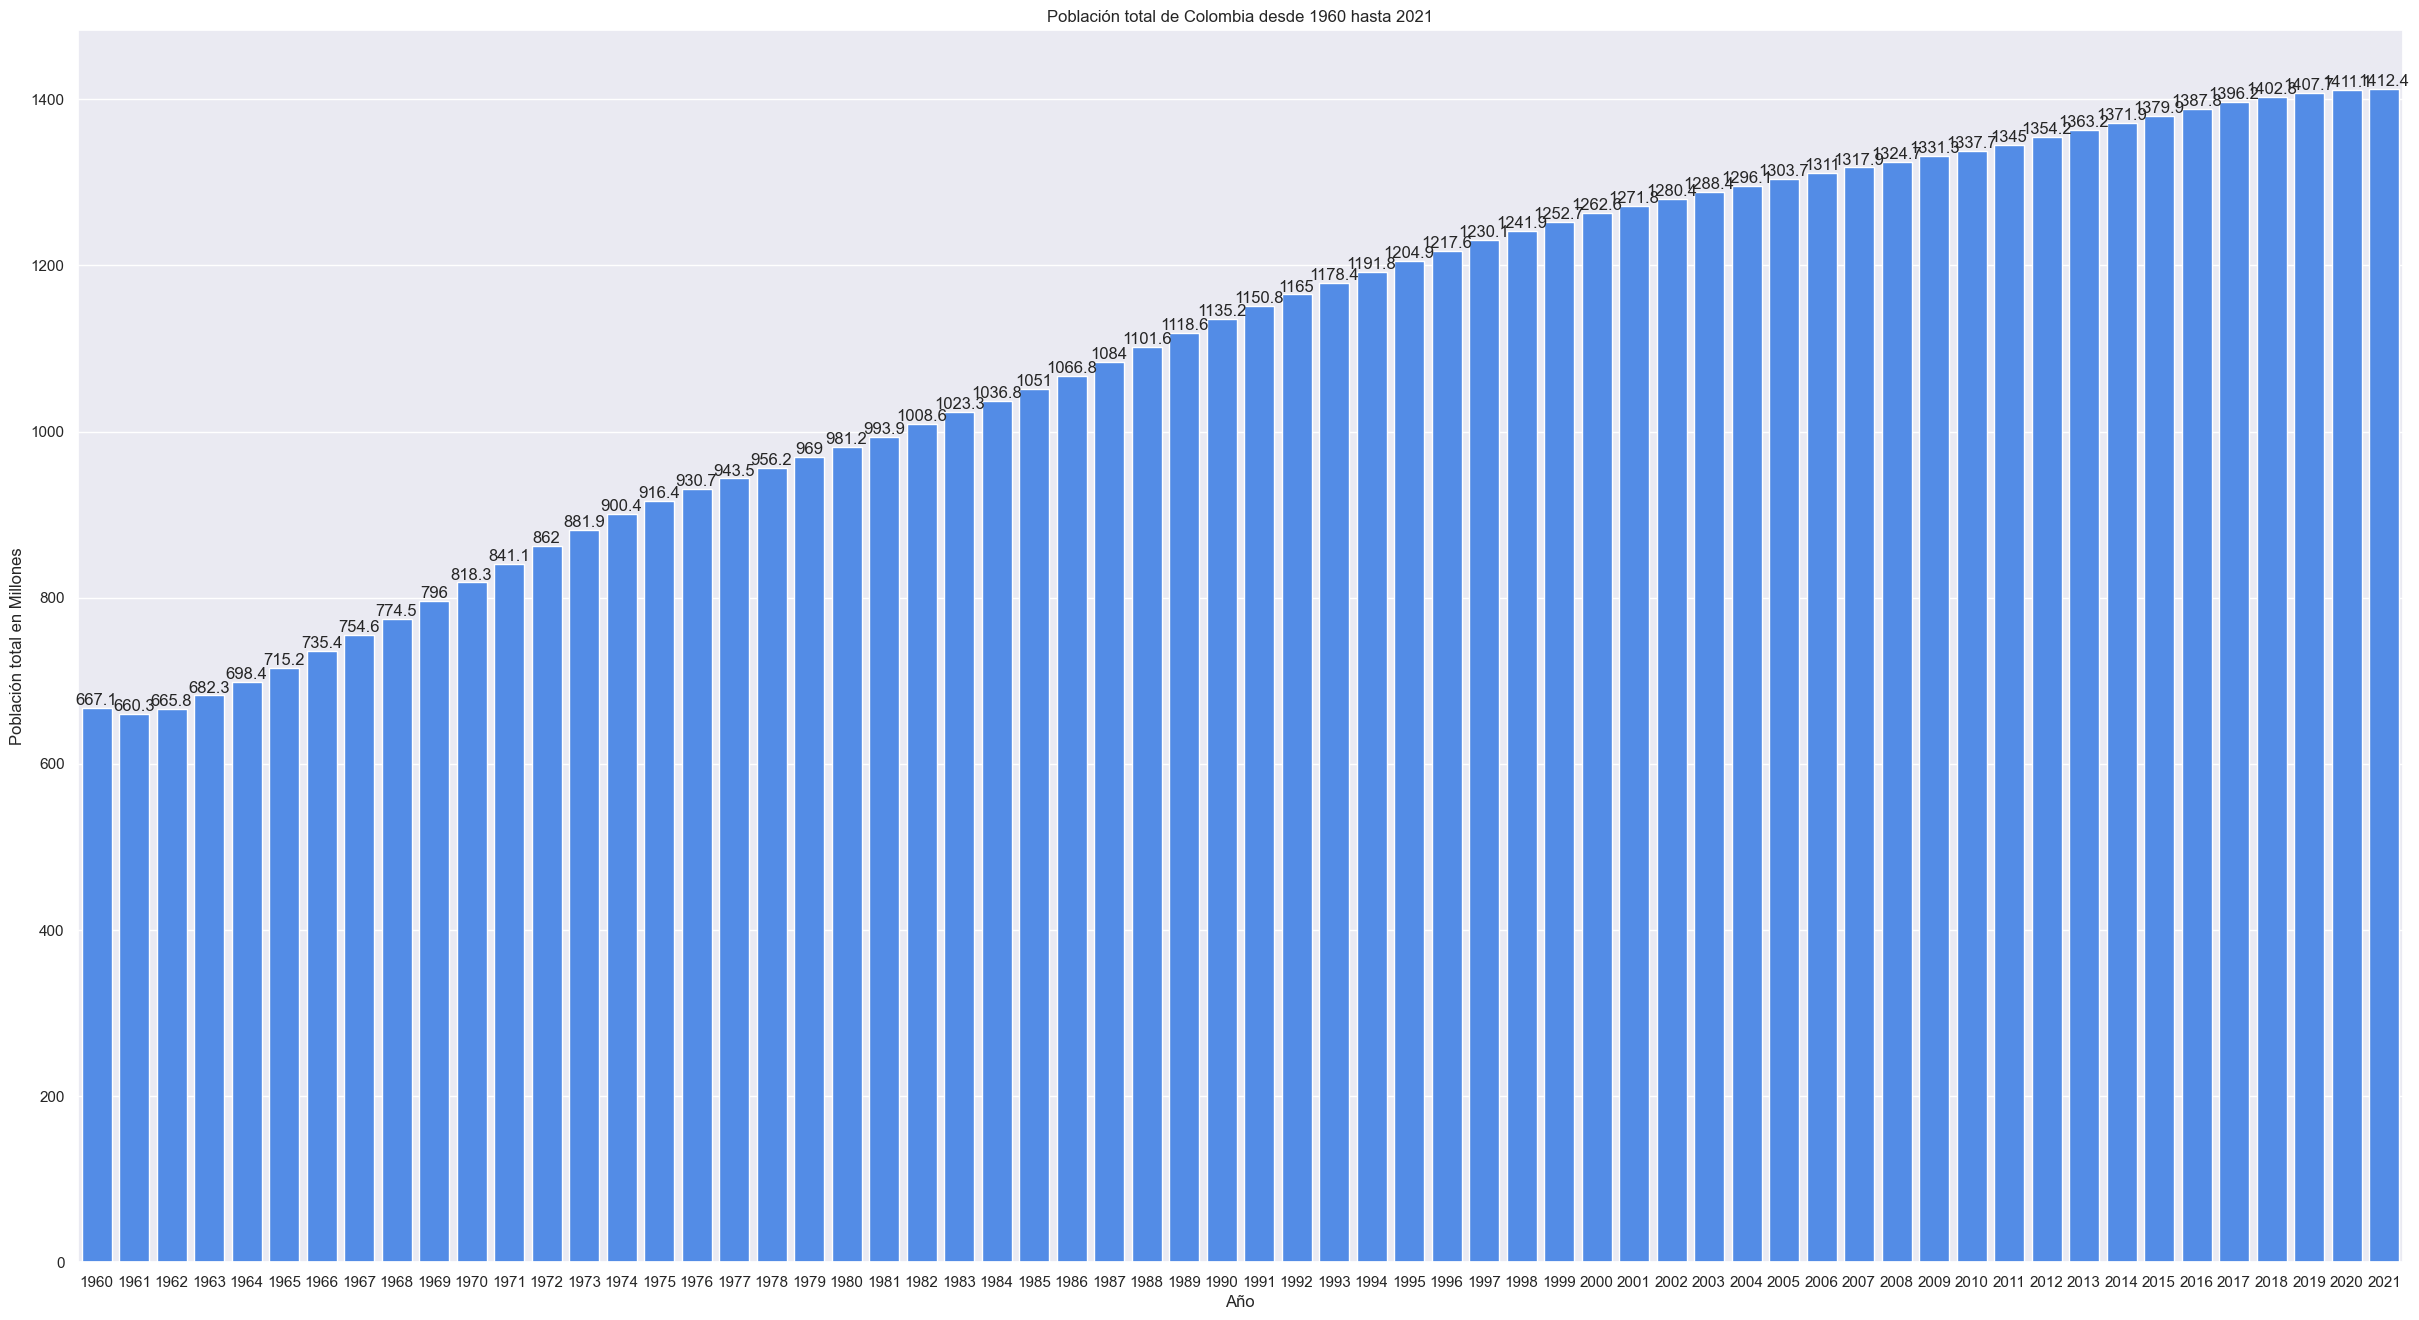

In [288]:
plt.figure(figsize=(30,16))
plt.title('Población total de Colombia desde 1960 hasta 2021')

sns.set_theme(style='darkgrid',
              palette='pastel')

ax = sns.barplot(data=df_population_col,
                 x='year',
                 y='population_million',
                 palette=['#3a86ff'])

for x in ax.containers:
    ax.bar_label(x, )

plt.xlabel('Año')
plt.ylabel('Población total en Millones')
plt.show()

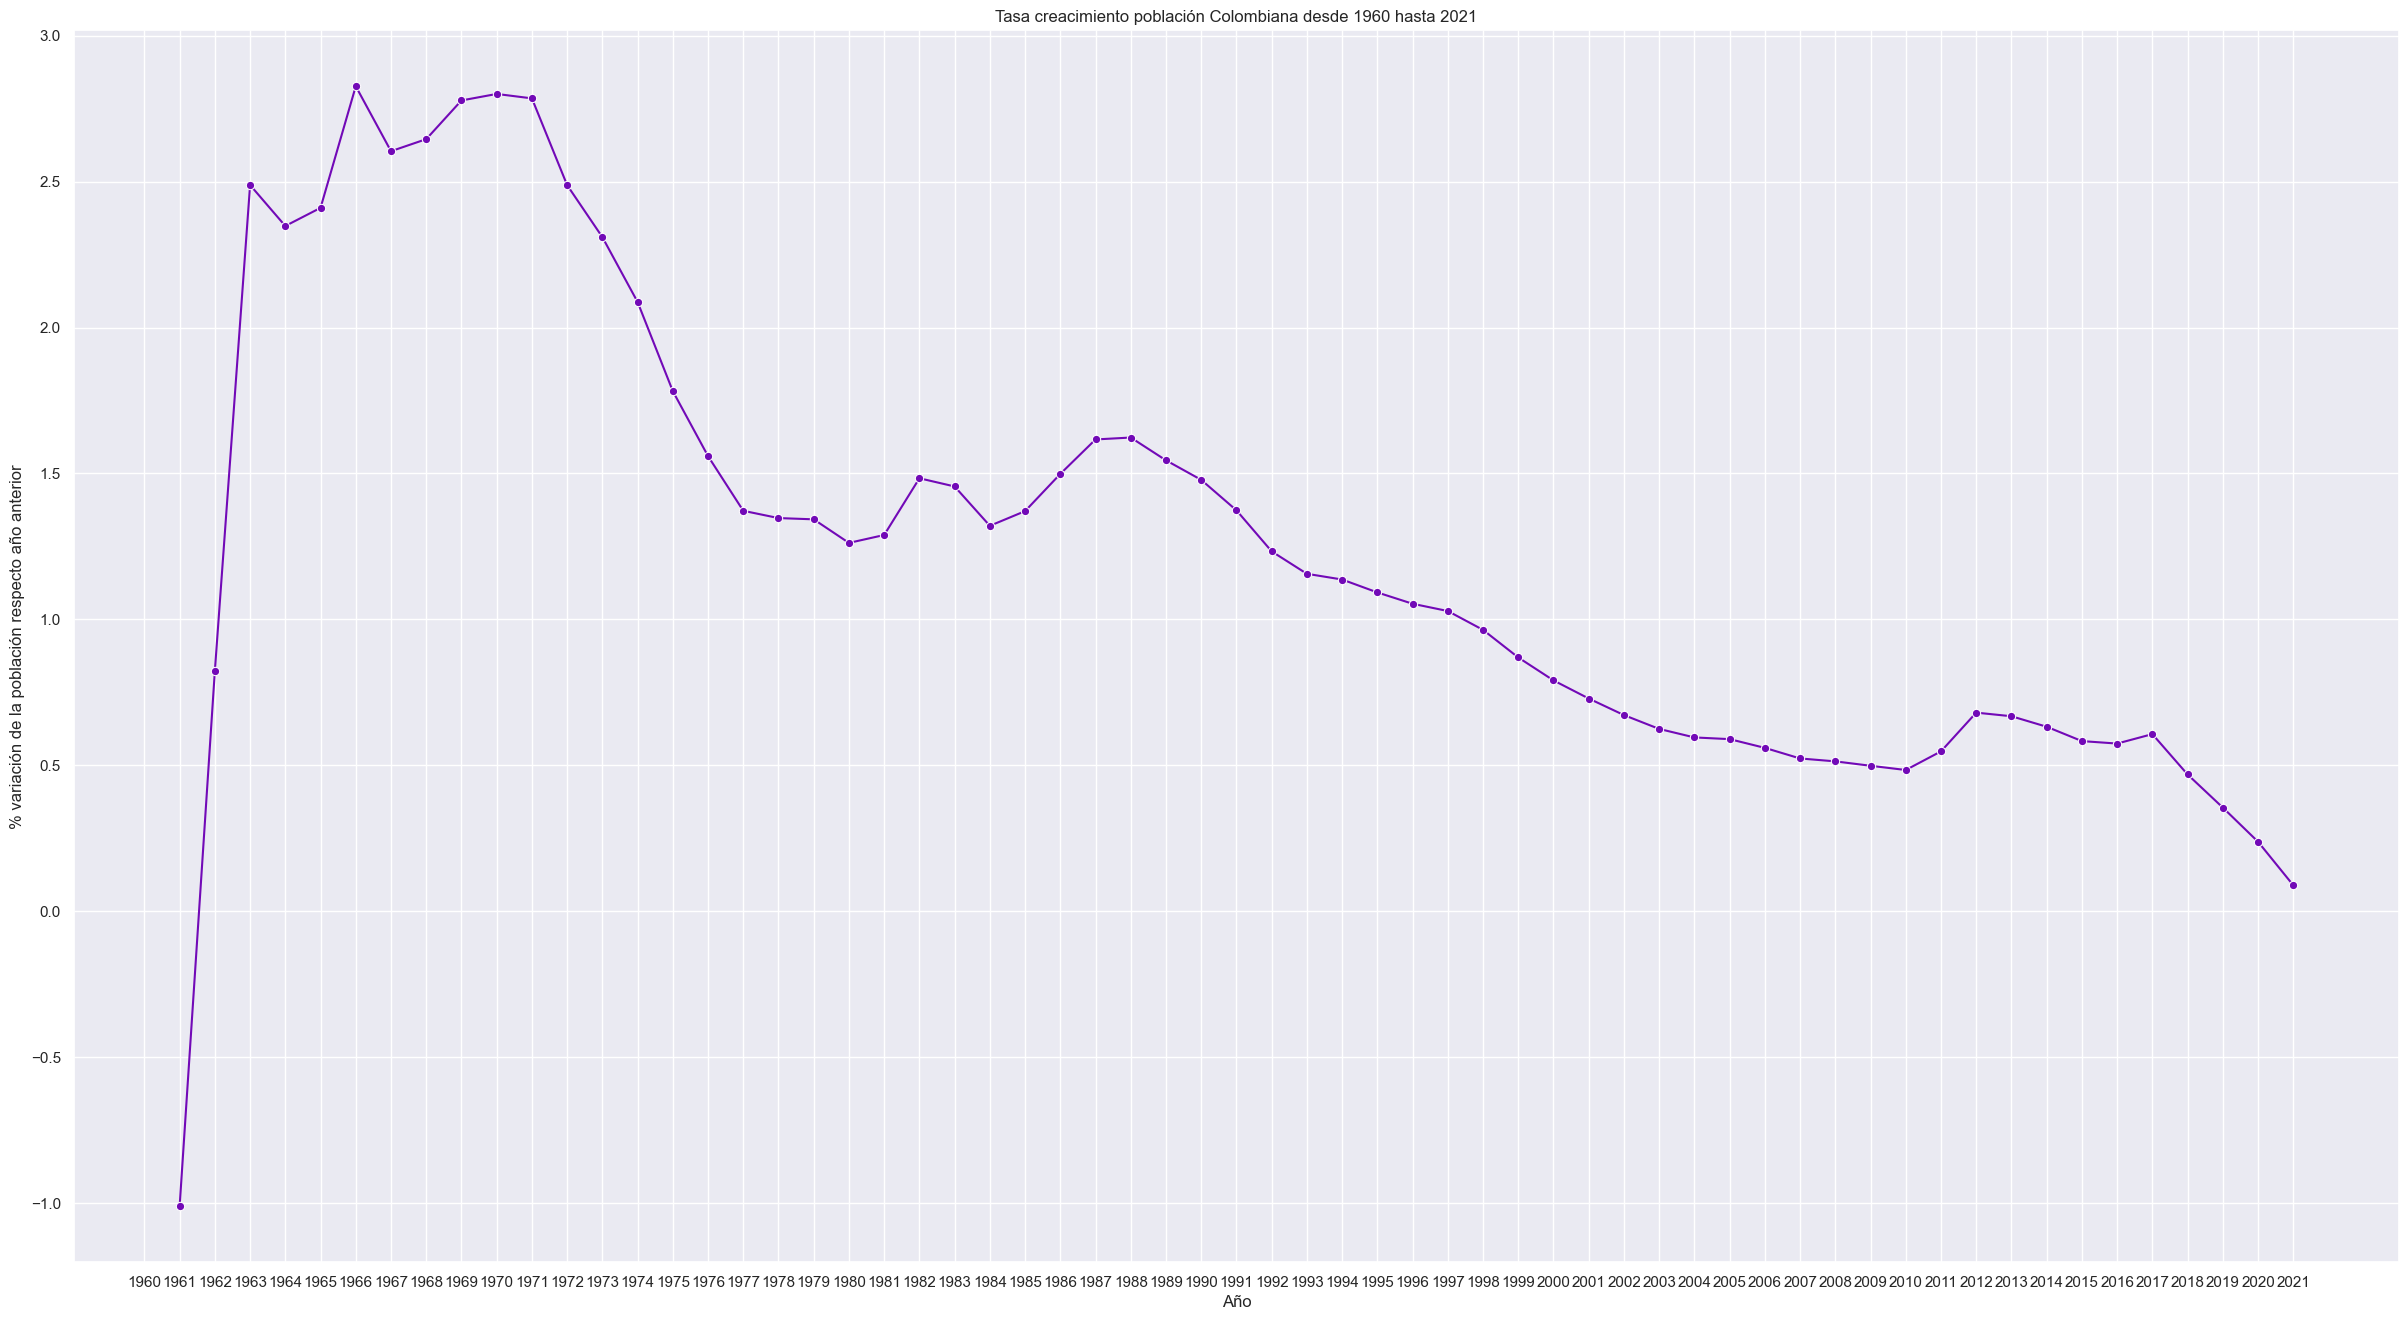

In [289]:
plt.figure(figsize=(30, 16))

ax = sns.lineplot(data=df_population_col,
                 x='year',
                 y='%_diff',
                 marker='o',
                 color = '#7209b7')
    
plt.title('Tasa creacimiento población Colombiana desde 1960 hasta 2021' )
plt.xlabel('Año')
plt.ylabel('% variación de la población respecto año anterior')
plt.show()